# Data preparation with reporting torchIO errors
Due to the problem with IO.stream redirecting in Jupyter Notebook, most of the code run outside of the notebook, from `dataset_creation.py` file.

## Creating a configurational file
At the begining pylidc library needs a configurational file `.pylidcrc` saved at the root directory. File have to include path to LIDC-IDRI dataset.

In [1]:
! pwd

/lu/tetyda/home/dzban112/Lung_cancer


In [2]:
path = '../LIDC_sets/manifest_10_patients/LIDC-IDRI'
with open('/home/dzban112/.pylidcrc', 'w') as f: # mode 'w' clear file and starts writing from the begining.
    f.write(f'[dicom]\npath = {path}\n\n')

In [3]:
! cat /home/dzban112/.pylidcrc

[dicom]
path = ../LIDC_sets/manifest_10_patients/LIDC-IDRI



## Defining base path and saving path
Base path is a path to the LIDCI-IDRI set. <br/>
Saving path is where the prepared dataset will be saved.

In [22]:
# define path to LIDC-IDRI data
base_path = "../LIDC_sets/manifest_10_patients/LIDC-IDRI"
# define path to save the dataset
save_path = "./dataset"

with open('paths.txt', 'w') as p:
    p.write(base_path + "\n")
    p.write(save_path)

## What data is extracted from LIDCI-IDRI set?
The scope of this notebook is to extract relevant data from the big LIDCI-IDRI set. Whole dataset include **1018** records, which are CT (Computer Tomography) scans of patients lungs.
Scans are annotated by maximally **4** annotators. Each annotation corresponds to a nodule and describes its attributes. For purpose of dataset creation I extracted following nodule attributes:
* sublety
* internalStructure
* calcification
* sphericity
* margin
* lobulation
* spiculation
* texture
* diameter

There is also hand-crafted target feature, which says whether nodule in benign or malignant.
Last but not the least, image data is extracted by cropping original scans. Only volume of dimmensions **(h, h, h)** which surrounds center of nodule is extracted. **Parameter h is set by default to 32.** It may be adjusted in `dataset_creation.py` file.

### Main script
Running it creates dataset with extracted values. Code makes following files:
* `{save_path}/match.pkl` - 2D array with matched LIDCI-IDRI patient ID and new nodule ID in the created dataset. 
* `{save_path}/annotations.pkl` - python dictionary object with annotations data saved as pickle file.
* `{save_path}/annotations_df.pkl` - Pandas DataFrame object with annotations data saved as pickle file.
<br/> Also following directories are prepared:
* `{save_path}/crops` - directory stores extracted image volumes with nodules.
* `{save_path}/masks` - directory stores corresponding to volumes masks.

In [32]:
! python3 dataset_creation.py

100%|███████████████████████████████████████████| 10/10 [00:56<00:00,  5.65s/it]


In [36]:
import pickle
import pandas as pd

# Creates pandas dataframe from dictionary and saves it as pickle
with open(f"{save_path}/annotations.pkl", "rb") as k:
    avg_annotations = pickle.load(k)
df_ann = pd.DataFrame.from_dict(avg_annotations)
df_ann.to_pickle(f"{save_path}/annotations_df.pkl")

In [37]:
df_ann.head()

,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,target,path
0,5.0,1.0,6.00,3.75,3.25,3.00,4.25,4.75,32.755812,1,0001.pt
1,5.0,1.0,6.00,4.00,3.25,2.00,3.00,4.00,31.001964,1,0002.pt
2,3.5,1.0,6.00,3.50,4.00,1.75,1.50,4.75,13.309155,1,0003.pt
3,4.0,1.0,6.00,4.50,5.00,1.00,1.00,5.00,14.983128,1,0004.pt
4,3.0,1.0,3.75,3.50,5.00,1.00,1.00,5.00,6.817327,0,0005.pt


### Visualisation of crops
Below function to visualise crops slices

In [38]:
import matplotlib.pyplot as plt
import torch

plt.set_cmap('gray')

def visualise_crop_slice(save_path, ID, slice_number):
    crop = torch.load(f"{save_path}/crops/{ID}")
    plt.figure(figsize=(5, 5))
    plt.imshow(crop[:,:,slice_number])
    plt.show()

<Figure size 432x288 with 0 Axes>

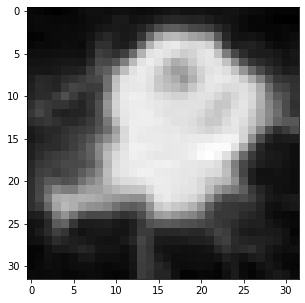

In [35]:
visualise_crop_slice(save_path, "0002.pt", 18)